In [324]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [325]:
csv_link="../dataset/dataset_color_prediction.csv"
csv_link="../dataset/sample.csv"

In [326]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [327]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dataframe=scaler.fit_transform(dataframe)
dataframe = pd.DataFrame(dataframe, columns = ['r1','g1','b1','r2','g2','b2','r3','g3','b3','r4','g4','b4'])

In [328]:
dataframe.head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,0.937255,0.486275,0.556863,0.980392,0.909804,0.878431,0.713725,0.886275,0.827451,0.847059,0.654902,0.694118
1,0.909804,0.705882,0.721569,0.933333,0.839216,0.827451,0.643137,0.576471,0.576471,0.403922,0.349020,0.368627
2,0.984314,0.905882,0.776471,0.705882,0.972549,0.784314,0.627451,0.905882,0.898039,1.000000,0.682353,0.737255
3,0.019608,0.266667,0.368627,0.094118,0.603922,0.705882,0.458824,0.901961,0.854902,0.831373,0.945098,0.956863
4,0.905882,0.823529,0.800000,0.725490,0.717647,0.741176,0.525490,0.545098,0.556863,0.933333,0.929412,0.905882


In [329]:
input_sequence = dataframe.copy()
target_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r2','g2','b2','r3','g3','b3','r4','g4','b4']]).T


In [330]:
target_sequence

,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,0.980392,0.909804,0.878431,0.713725,0.886275,0.827451,0.847059,0.654902,0.694118
1,0.933333,0.839216,0.827451,0.643137,0.576471,0.576471,0.403922,0.349020,0.368627
2,0.705882,0.972549,0.784314,0.627451,0.905882,0.898039,1.000000,0.682353,0.737255
3,0.094118,0.603922,0.705882,0.458824,0.901961,0.854902,0.831373,0.945098,0.956863
4,0.725490,0.717647,0.741176,0.525490,0.545098,0.556863,0.933333,0.929412,0.905882
...,...,...,...,...,...,...,...,...,...
1995,0.901961,0.870588,0.827451,0.200000,0.529412,0.364706,0.854902,0.400000,0.313725
1996,0.921569,0.317647,0.368627,0.827451,0.752941,0.698039,0.043137,0.035294,0.035294
1997,0.184314,0.850980,0.937255,0.019608,0.701961,0.921569,0.917647,0.917647,0.901961
1998,0.000000,0.450980,0.360784,0.968627,0.529412,0.172549,0.709804,0.694118,0.674510


In [331]:
input_sequence

,r1,g1,b1
0,0.937255,0.486275,0.556863
1,0.909804,0.705882,0.721569
2,0.984314,0.905882,0.776471
3,0.019608,0.266667,0.368627
4,0.905882,0.823529,0.800000
...,...,...,...
1995,0.607843,0.556863,0.545098
1996,0.352941,0.568627,0.733333
1997,0.270588,0.380392,0.466667
1998,0.137255,0.101961,0.101961


In [332]:
input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], 1))
target_sequence = np.reshape(target_sequence, (2000,-1))


In [333]:
input_sequence.shape


(2000, 3, 1)

In [334]:
target_sequence.shape

(2000, 9)

In [335]:
X_train, X_test, y_train, y_test = train_test_split(input_sequence, target_sequence, test_size=0.33)

In [336]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(input_sequence.shape[1], input_sequence.shape[2])))
model.add(tf.keras.layers.Dense(36))
model.add(tf.keras.layers.Dense(target_sequence.shape[1]))



In [337]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])



In [338]:
model.input_shape

(None, 3, 1)

In [339]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 50)                10400     
                                                                 
 dense_56 (Dense)            (None, 36)                1836      
                                                                 
 dense_57 (Dense)            (None, 9)                 333       
                                                                 
Total params: 12,569
Trainable params: 12,569
Non-trainable params: 0
_________________________________________________________________


In [340]:
input_sequence[3]

array([[0.01960784],
       [0.26666667],
       [0.36862745]])

In [341]:
# Train the model
history=model.fit(X_train, y_train, epochs=1000, batch_size=32,
                    verbose=1,validation_data=(X_test,y_test))



Epoch 1/1000
42/42 [==============================] - 2s 10ms/step - loss: 0.2730 - accuracy: 0.2455 - val_loss: 0.1067 - val_accuracy: 0.2545
Epoch 2/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.2619 - val_loss: 0.0903 - val_accuracy: 0.2091
Epoch 3/1000
42/42 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.2425 - val_loss: 0.0876 - val_accuracy: 0.2364
Epoch 4/1000
42/42 [==============================] - 0s 5ms/step - loss: 0.0873 - accuracy: 0.2612 - val_loss: 0.0870 - val_accuracy: 0.2227
Epoch 5/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0871 - accuracy: 0.2470 - val_loss: 0.0870 - val_accuracy: 0.2394
Epoch 6/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0870 - accuracy: 0.2485 - val_loss: 0.0868 - val_accuracy: 0.2242
Epoch 7/1000
42/42 [==============================] - 0s 4ms/step - loss: 0.0870 - accuracy: 0.2545 - val_loss: 0.0866 - val_accuracy: 0.2379
Epoch

In [342]:
# Generate some test data
dara=[[223,158,114]]

test_input = np.array(dara)
scaled_input=scaler.fit_transform(dara)
predictions = model.predict(scaled_input)
predictions= predictions*255
# Print the predictions
print(predictions)

1/1 [==============================] - 0s 135ms/step
[[116.01545   75.55253   85.088135 146.04051  126.90733  139.86595
  150.62799  138.63084  159.31876 ]]


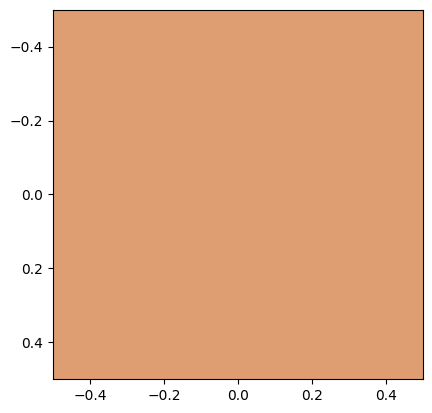

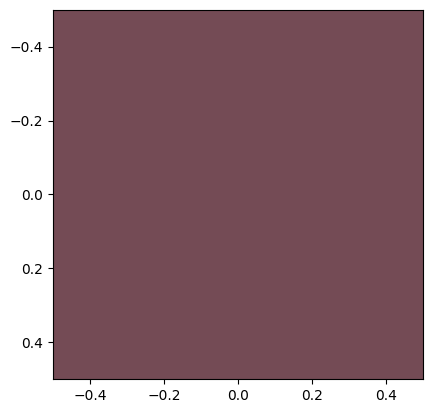

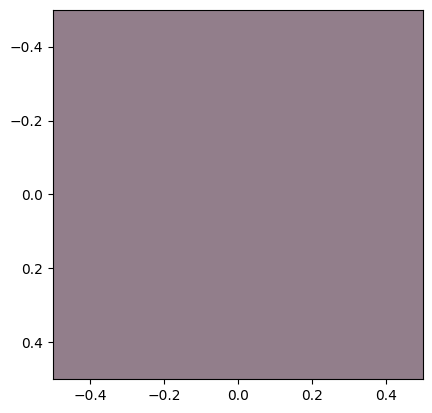

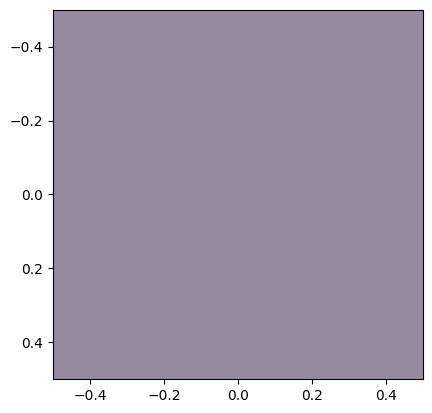

In [343]:
plt.imshow([[[x / 255 for x in test_input[0]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
plt.show()

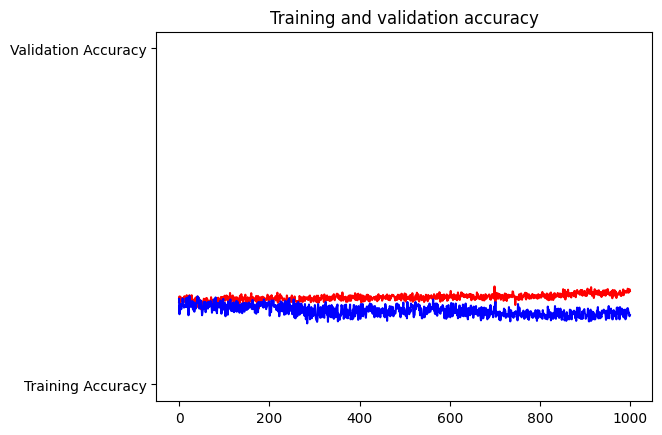

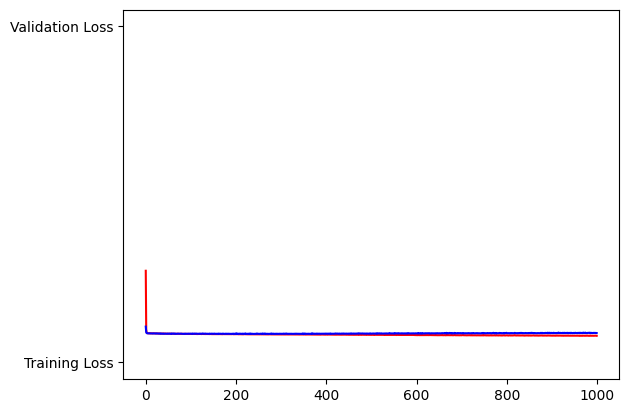

In [344]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()